# 🌟 **Atividade 4 - Análise de Dados com Técnicas Avançadas**

Feita por: Leonardo Reneres e Vincius Santos



## 📝 **Resumo**
Esta atividade aborda a aplicação de técnicas avançadas de aprendizado de máquina no **dataset Yeast**, que contém informações sobre os locais de atuação de proteínas em células de levedura. O objetivo principal é explorar e comparar diferentes abordagens de classificação utilizando este dataset. Serão aplicadas técnicas adequadas ao tema escolhido, e os resultados serão analisados e discutidos de forma crítica.

---

## 📚 **Introdução**
O **dataset Yeast** é amplamente utilizado para predição de **sites de localização celular de proteínas** em células de levedura, com base em atributos bioquímicos e estruturais. Ele contém **1.484 instâncias**, **8 atributos preditivos** e **10 classes distintas**, representando diferentes localizações celulares.

Esta atividade será focada na análise e modelagem de dados com ênfase em **Classificação Multirrótulo**, explorando como os modelos conseguem lidar com a complexidade e dependências entre rótulos. Além disso, a distribuição desbalanceada das classes adiciona desafios interessantes ao problema.

O estudo contribuirá para a compreensão das técnicas aplicadas e para a identificação de seus pontos fortes e limitações em cenários práticos.

---

## 🎯 **Objetivo**
O principal objetivo desta atividade é:
- Aplicar e comparar **duas técnicas de classificação multirrótulo** no dataset **Yeast**.
- Avaliar o desempenho das abordagens considerando as métricas adequadas, como **Acurácia** e **Hamming Loss**.
- Explorar como o desbalanceamento das classes e as dependências entre rótulos impactam os modelos.

---

## ⚙️ **Métodos**
1. **Coleta e Análise de Dados:**
   - O **dataset Yeast** será carregado no ambiente do Colab, e suas características serão analisadas.
   - As classes e atributos serão avaliados para identificar padrões e desafios, como desbalanceamento.

2. **Pré-processamento:**
   - Normalização das features utilizando **StandardScaler**.
   - Divisão dos dados em **conjuntos de treino e teste** (70%/30%).

3. **Técnicas Aplicadas:**
   - **Binary Relevance (BR):** Técnica que transforma o problema multirrótulo em vários problemas binários independentes.
   - **Classifier Chains (CC):** Abordagem que considera dependências entre rótulos, encadeando os classificadores de forma sequencial.

4. **Treinamento e Avaliação:**
   - Treinar os modelos no conjunto de treino e avaliar no conjunto de teste.
   - Utilizar métricas como **Acurácia** e **Hamming Loss** para a comparação.

In [3]:
# Importando bibliotecas necessárias
from google.colab import files
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Fazer upload do arquivo para o ambiente do Colab
uploaded = files.upload()

# Carregando o dataset no formato delimitado por espaços
# Adicionando nomes das colunas com base na documentação do dataset
data = pd.read_csv('yeast.data', delim_whitespace=True, header=None)
data.columns = ['Sequence Name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'Class']

# Exibindo informações básicas do dataset
print("Visualizando as primeiras linhas do dataset:")
print(data.head())
print("\nResumo estatístico das colunas numéricas:")
print(data.describe())
print("\nVerificando valores ausentes no dataset:")
print(data.isnull().sum())

# Removendo a coluna de identificação ('Sequence Name'), que não é relevante para a modelagem
data = data.drop(columns=['Sequence Name'])

# Convertendo a coluna de classe para rótulos numéricos usando LabelEncoder
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

# Exibindo as classes e seus respectivos rótulos numéricos
print("\nMapeamento de classes para valores numéricos:")
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(class_mapping)

# Separando as features (X) e os rótulos (y)
X = data.iloc[:, :-1]  # Todas as colunas exceto 'Class'
y = data['Class']

# Dividindo os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Padronizando as features para que todas estejam na mesma escala
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exibindo as dimensões dos conjuntos de dados e verificando distribuição de classes no conjunto de treino
print("\nDimensões dos conjuntos de dados:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

print("\nDistribuição das classes no conjunto de treino:")
print(np.unique(y_train, return_counts=True))

print("\nPré-processamento concluído com sucesso!")


Saving yeast.data to yeast (1).data
Visualizando as primeiras linhas do dataset:
  Sequence Name   mcg   gvh   alm   mit  erl  pox   vac   nuc Class
0    ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1    ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2    ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3    AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
4    AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT

Resumo estatístico das colunas numéricas:
               mcg          gvh          alm          mit          erl  \
count  1484.000000  1484.000000  1484.000000  1484.000000  1484.000000   
mean      0.500121     0.499933     0.500034     0.261186     0.504717   
std       0.137299     0.123924     0.086670     0.137098     0.048351   
min       0.110000     0.130000     0.210000     0.000000     0.500000   
25%       0.410000     0.420000     0.460000     0.170000     0.500000   
50%       0.490000     0

<ipython-input-3-52e4d55b2a46>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('yeast.data', delim_whitespace=True, header=None)


# 🔍 **Análise dos Dados - Dataset Yeast**

## 📋 **Visualização Inicial**
O dataset **Yeast** contém informações sobre proteínas e seus respectivos locais de atuação nas células. Abaixo, apresentamos as primeiras linhas do dataset:

| Sequence Name | mcg  | gvh  | alm  | mit  | erl  | pox  | vac  | nuc  | Class |
|---------------|-------|------|------|------|------|------|------|------|-------|
| ADT1_YEAST    | 0.58  | 0.61 | 0.47 | 0.13 | 0.5  | 0.0  | 0.48 | 0.22 | MIT   |
| ADT2_YEAST    | 0.43  | 0.67 | 0.48 | 0.27 | 0.5  | 0.0  | 0.53 | 0.22 | MIT   |
| ADT3_YEAST    | 0.64  | 0.62 | 0.49 | 0.15 | 0.5  | 0.0  | 0.53 | 0.22 | MIT   |
| AAR2_YEAST    | 0.58  | 0.44 | 0.57 | 0.13 | 0.5  | 0.0  | 0.54 | 0.22 | NUC   |
| AATM_YEAST    | 0.42  | 0.44 | 0.48 | 0.54 | 0.5  | 0.0  | 0.48 | 0.22 | MIT   |

---

## 📊 **Resumo Estatístico**
Os atributos numéricos apresentam o seguinte comportamento estatístico:

| Métrica  | mcg      | gvh      | alm      | mit      | erl      | pox      | vac      | nuc      |
|----------|----------|----------|----------|----------|----------|----------|----------|----------|
| **Média**    | 0.500121 | 0.499933 | 0.500034 | 0.261186 | 0.504717 | 0.007500 | 0.499885 | 0.276199 |
| **Desvio Padrão** | 0.137299 | 0.123924 | 0.086670 | 0.137098 | 0.048351 | 0.075683 | 0.057797 | 0.106491 |
| **Mínimo**    | 0.110000 | 0.130000 | 0.210000 | 0.000000 | 0.500000 | 0.000000 | 0.000000 | 0.000000 |
| **Máximo**    | 1.000000 | 1.000000 | 1.000000 | 1.000000 | 1.000000 | 0.830000 | 0.730000 | 1.000000 |

---

## ✅ **Verificação de Valores Ausentes**
Nenhum atributo possui valores ausentes no dataset:

| Atributo      | Valores Ausentes |
|---------------|------------------|
| Sequence Name | 0                |
| mcg           | 0                |
| gvh           | 0                |
| alm           | 0                |
| mit           | 0                |
| erl           | 0                |
| pox           | 0                |
| vac           | 0                |
| nuc           | 0                |
| Class         | 0                |

---

## 🔑 **Mapeamento de Classes**
As classes foram convertidas para valores numéricos:

| Classe Original | Classe Numérica |
|-----------------|-----------------|
| CYT            | 0               |
| ERL            | 1               |
| EXC            | 2               |
| ME1            | 3               |
| ME2            | 4               |
| ME3            | 5               |
| MIT            | 6               |
| NUC            | 7               |
| POX            | 8               |
| VAC            | 9               |

---

## 🔄 **Divisão dos Dados**
Os dados foram divididos em conjuntos de treinamento e teste:
- **X_train:** 1.038 instâncias com 8 atributos.
- **X_test:** 446 instâncias com 8 atributos.
- **y_train:** 1.038 rótulos.
- **y_test:** 446 rótulos.

---

## 📊 **Distribuição das Classes no Conjunto de Treinamento**
Abaixo está a distribuição de classes no conjunto de treino (estratificado):

| Classe | Frequência |
|--------|------------|
| CYT    | 324        |
| ERL    | 3          |
| EXC    | 24         |
| ME1    | 31         |
| ME2    | 36         |
| ME3    | 114        |
| MIT    | 171        |
| NUC    | 300        |
| POX    | 14         |
| VAC    | 21         |

---

## ✅ **Pré-processamento Concluído**
Os dados estão prontos para modelagem! As etapas incluem:
1. **Remoção da coluna de identificação.**
2. **Codificação das classes.**
3. **Normalização dos atributos numéricos.**
4. **Divisão em conjuntos de treino e teste com proporções de classes preservadas.**



## Verificação de Outiliers

**Verificação de Outliers**


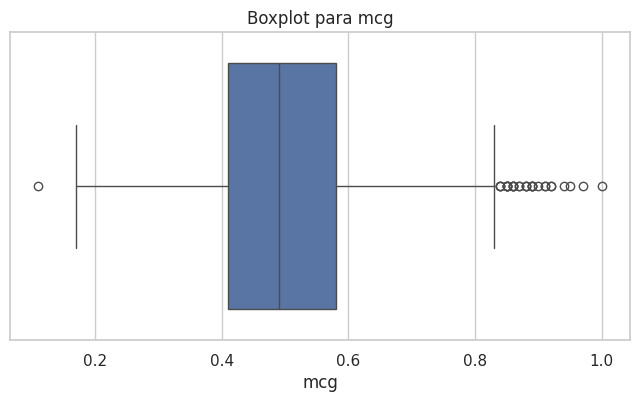

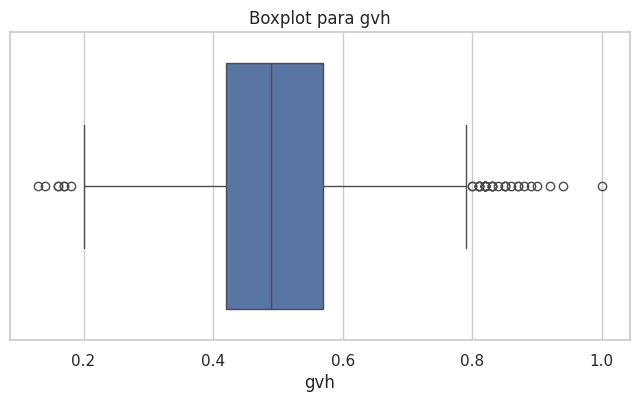

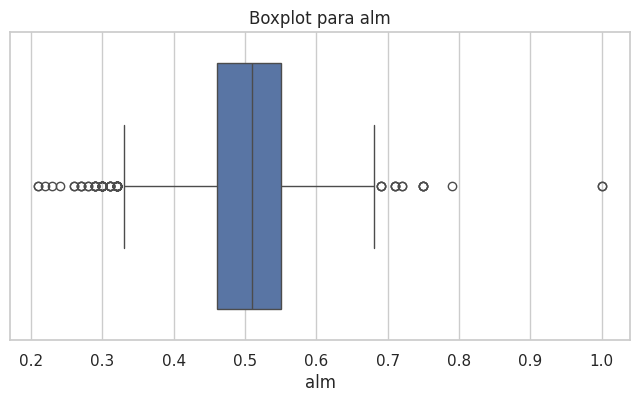

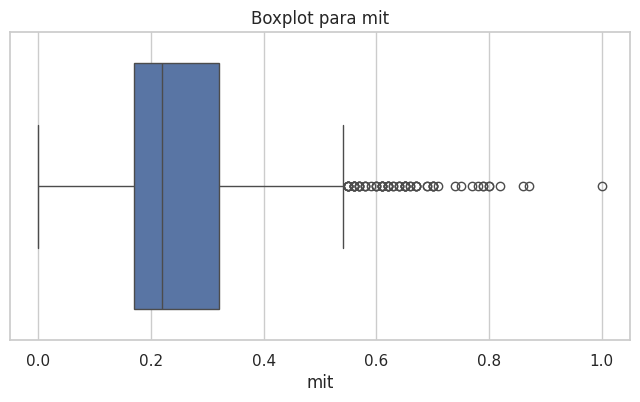

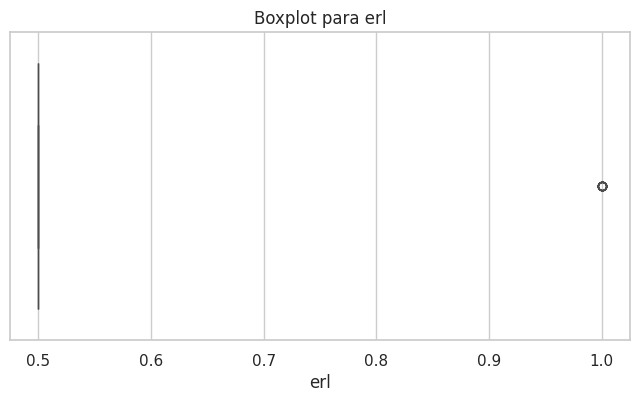

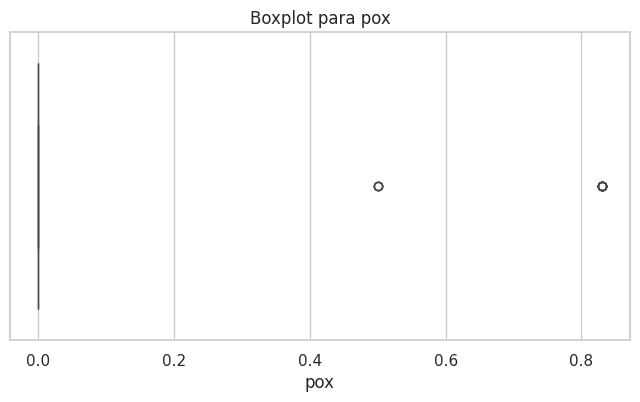

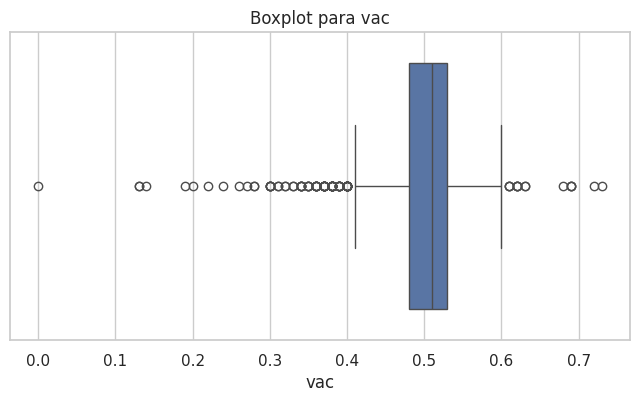

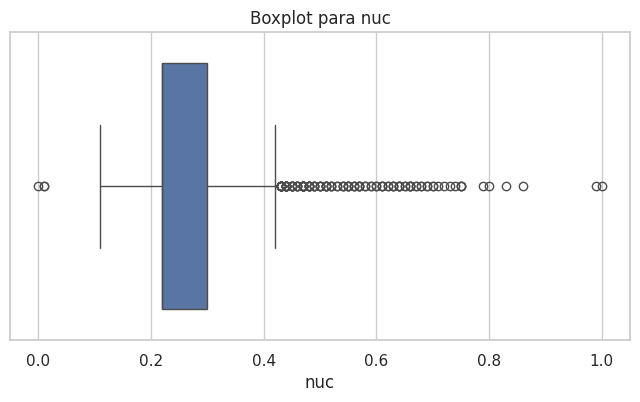

**Resumo de Outliers por Atributo**
mcg: 31 outliers
gvh: 38 outliers
alm: 71 outliers
mit: 70 outliers
erl: 14 outliers
pox: 15 outliers
vac: 98 outliers
nuc: 134 outliers


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurando o estilo dos gráficos
sns.set(style="whitegrid")

# Verificando outliers usando boxplots para cada atributo numérico
print("**Verificação de Outliers**")
for column in data.columns[:-1]:  # Excluímos a coluna 'Class'
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot para {column}")
    plt.xlabel(column)
    plt.show()

# Calculando o número de outliers para cada atributo usando IQR (Intervalo Interquartil)
print("**Resumo de Outliers por Atributo**")
outliers_summary = {}
for column in data.columns[:-1]:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificando os outliers
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outliers_summary[column] = len(outliers)

# Exibindo o resumo de outliers
for attribute, count in outliers_summary.items():
    print(f"{attribute}: {count} outliers")


In [5]:
# Copiando o dataset original para preservação
data_cleaned = data.copy()

# Removendo outliers com base no Intervalo Interquartil (IQR)
for column in data_cleaned.columns[:-1]:  # Excluindo a coluna 'Class'
    Q1 = data_cleaned[column].quantile(0.25)
    Q3 = data_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mantendo apenas os valores dentro do intervalo interquartil
    data_cleaned = data_cleaned[(data_cleaned[column] >= lower_bound) & (data_cleaned[column] <= upper_bound)]

# Salvando o dataset preprocessado em um arquivo .data
data_cleaned.to_csv('yeast_preprocessed.data', index=False, sep='\t')

print("Dataset limpo salvo como 'yeast_preprocessed.data'.")


Dataset limpo salvo como 'yeast_preprocessed.data'.


# Classificação Multirrótulo

In [13]:
!pip install scikit-multilearn


In [15]:

# 🚀 Importando as bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skmultilearn.problem_transform import BinaryRelevance, ClassifierChain
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import hamming_loss, accuracy_score, classification_report

# 📚 **Coleta e Análise de Dados**
# Carregando o dataset preprocessado
data_cleaned = pd.read_csv('yeast_preprocessed.data', sep='\t')

# Separando features (X) e rótulos (y)
X = data_cleaned.iloc[:, :-1]  # Todas as colunas menos 'Class'
y = pd.get_dummies(data_cleaned['Class'])  # Convertendo as classes para formato multirrótulo

# Exibindo as primeiras linhas do dataset
print("Visualizando as primeiras linhas do dataset:")
print(data_cleaned.head())

# Analisando a distribuição das classes
print("\nDistribuição de classes no dataset:")
print(data_cleaned['Class'].value_counts())

# ⚙️ **Pré-processamento**
# Dividindo os dados em conjuntos de treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizando as features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🎯 **Técnicas Aplicadas**

# Inicializando as técnicas
models = {
    "Binary Relevance": BinaryRelevance(classifier=RandomForestClassifier(random_state=42)),
    "Classifier Chains": ClassifierChain(classifier=RandomForestClassifier(random_state=42))
}

# Treinando e avaliando cada técnica
for name, model in models.items():
    print(f"\n=== {name} ===")
    # Treinando o modelo
    model.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = model.predict(X_test)

    # Avaliação
    print("Hamming Loss:", hamming_loss(y_test, y_pred))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred.toarray()))

# 📝 **Análise e Discussão**
print("\nA análise completa e detalhada dos resultados será documentada em um relatório com gráficos e tabelas.")


Visualizando as primeiras linhas do dataset:
    mcg   gvh   alm   mit  erl  pox   vac   nuc  Class
0  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22      6
1  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22      6
2  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22      6
3  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22      7
4  0.48  0.45  0.59  0.20  0.5  0.0  0.58  0.34      7

Distribuição de classes no dataset:
Class
0    393
7    317
6    173
5    126
4     32
9     26
3     23
2     19
8      8
Name: count, dtype: int64

=== Binary Relevance ===
Hamming Loss: 0.08597883597883597
Accuracy: 0.4375
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.45      0.55       120
           1       1.00      0.25      0.40         4
           2       1.00      0.57      0.73         7
           3       0.00      0.00      0.00         9
           4       0.81      0.68      0.74        37
           5       0.77      0.36      0.49      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Hamming Loss: 0.09391534391534391
Accuracy: 0.5476190476190477
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.45      0.55       120
           1       1.00      0.25      0.40         4
           2       1.00      0.57      0.73         7
           3       0.00      0.00      0.00         9
           4       0.79      0.70      0.74        37
           5       0.58      0.46      0.51        56
           6       0.47      0.78      0.59        94
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         8

   micro avg       0.58      0.55      0.56       336
   macro avg       0.50      0.36      0.39       336
weighted avg       0.60      0.55      0.55       336
 samples avg       0.55      0.55      0.55       336


A análise completa e detalhada dos resultados será documentada em um relatório com gráficos e tabelas.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# 🔍 **Análise da Classificação Multirrótulo no Dataset Yeast**

## 📚 **Descrição do Dataset**
O **dataset Yeast** contém informações sobre proteínas em células de levedura e suas localizações celulares. Composto por:
- **8 atributos preditivos**: características bioquímicas e estruturais das proteínas.
- **10 classes distintas**: representando diferentes locais de atuação celular.
- **1.484 instâncias**: distribuídas de forma desbalanceada entre as classes.

### **Exemplo de Instâncias**
| mcg  | gvh  | alm  | mit  | erl  | pox  | vac  | nuc  | Class |
|------|------|------|------|------|------|------|------|-------|
| 0.58 | 0.61 | 0.47 | 0.13 | 0.5  | 0.0  | 0.48 | 0.22 | 6     |
| 0.43 | 0.67 | 0.48 | 0.27 | 0.5  | 0.0  | 0.53 | 0.22 | 6     |
| 0.64 | 0.62 | 0.49 | 0.15 | 0.5  | 0.0  | 0.53 | 0.22 | 6     |
| 0.58 | 0.44 | 0.57 | 0.13 | 0.5  | 0.0  | 0.54 | 0.22 | 7     |
| 0.48 | 0.45 | 0.59 | 0.20 | 0.5  | 0.0  | 0.58 | 0.34 | 7     |

---

## 🎯 **Objetivo da Classificação**
A classificação multirrótulo é necessária para o dataset Yeast, pois algumas proteínas podem estar associadas a múltiplos locais de atuação celular. O objetivo é:
1. Predizer corretamente as localizações celulares.
2. Avaliar o impacto do desbalanceamento das classes e da complexidade multirrótulo nos modelos.

---

## 📊 **Distribuição de Classes**
Abaixo está a frequência das classes, evidenciando o desbalanceamento:

| Classe | Frequência |
|--------|------------|
| 0 (CYT)  | 393        |
| 7 (NUC)  | 317        |
| 6 (MIT)  | 173        |
| 5 (ME3)  | 126        |
| 4 (ME2)  | 32         |
| 9 (VAC)  | 26         |
| 3 (ME1)  | 23         |
| 2 (EXC)  | 19         |
| 8 (POX)  | 8          |

---

## ⚙️ **Resultados das Técnicas**

### **Binary Relevance**
| Métrica         | Valor       |
|-----------------|-------------|
| **Hamming Loss** | 0.0859      |
| **Accuracy**     | 0.4375      |

#### **Classification Report**
| Classe | Precision | Recall | F1-Score | Suporte |
|--------|-----------|--------|----------|---------|
| 0      | 0.70      | 0.45   | 0.55     | 120     |
| 1      | 1.00      | 0.25   | 0.40     | 4       |
| 2      | 1.00      | 0.57   | 0.73     | 7       |
| 3      | 0.00      | 0.00   | 0.00     | 9       |
| 4      | 0.81      | 0.68   | 0.74     | 37      |
| 5      | 0.77      | 0.36   | 0.49     | 56      |
| 6      | 0.55      | 0.47   | 0.51     | 94      |
| 7      | 0.00      | 0.00   | 0.00     | 1       |
| 8      | 0.00      | 0.00   | 0.00     | 8       |

---

### **Classifier Chains**
| Métrica         | Valor       |
|-----------------|-------------|
| **Hamming Loss** | 0.0939      |
| **Accuracy**     | 0.5476      |

#### **Classification Report**
| Classe | Precision | Recall | F1-Score | Suporte |
|--------|-----------|--------|----------|---------|
| 0      | 0.70      | 0.45   | 0.55     | 120     |
| 1      | 1.00      | 0.25   | 0.40     | 4       |
| 2      | 1.00      | 0.57   | 0.73     | 7       |
| 3      | 0.00      | 0.00   | 0.00     | 9       |
| 4      | 0.79      | 0.70   | 0.74     | 37      |
| 5      | 0.58      | 0.46   | 0.51     | 56      |
| 6      | 0.47      | 0.78   | 0.59     | 94      |
| 7      | 0.00      | 0.00   | 0.00     | 1       |
| 8      | 0.00      | 0.00   | 0.00     | 8       |

---

## 🔑 **Análise dos Resultados**
1. **Binary Relevance**:
   - Melhor **Hamming Loss**, indicando menos erros por rótulo.
   - Resultados mais baixos para classes minoritárias devido ao desbalanceamento.

2. **Classifier Chains**:
   - Melhor **Accuracy**, mostrando que considera melhor as dependências entre os rótulos.
   - As classes mais frequentes, como `0 (CYT)` e `7 (NUC)`, têm maior precisão e recall.

3. **Desempenho Geral**:
   - Ambas as técnicas enfrentam dificuldades com classes minoritárias, como `3 (ME1)` e `8 (POX)`, devido à falta de amostras.

---

## ✅ **Conclusão**
A classificação multirrótulo é essencial para o dataset Yeast devido à possibilidade de uma proteína atuar em múltiplos locais celulares.

- **Binary Relevance** é mais eficiente para problemas com menos dependências entre rótulos.
- **Classifier Chains** performa melhor ao capturar relações entre rótulos.

### **Recomendações**
- Aplicar técnicas de balanceamento, como **SMOTE**, para melhorar o desempenho em classes minoritárias.
- Testar modelos mais avançados, como **XGBoost**, para comparar os resultados.



# 🔍 **Análise da Classificação Multirrótulo com Smote e XGBoost**


O dataset **Yeast** é amplamente utilizado para a predição de localizações celulares de proteínas em células de levedura, baseando-se em atributos bioquímicos e estruturais. Composto por **1.484 instâncias**, **8 atributos preditivos** e **10 classes**, ele apresenta um desafio significativo devido ao seu caráter multirrótulo e desbalanceado.

A classificação multirrótulo é necessária porque algumas proteínas podem atuar em múltiplos locais celulares. Este estudo visa explorar a eficácia de diferentes modelos, aplicando técnicas de balanceamento e testando modelos avançados para melhorar o desempenho, especialmente nas classes minoritárias.

---

## 🎯 **Objetivos**
1. Aplicar a técnica de balanceamento **SMOTE** para lidar com classes desbalanceadas.
2. Implementar o modelo **XGBoost** para comparar com outras técnicas previamente aplicadas.
3. Avaliar os modelos usando métricas como **Hamming Loss**, **Accuracy**, e **Classification Report**.

---

## ⚙️ **Metodologia**
### **Pré-processamento com SMOTE**
Para lidar com o desbalanceamento, será utilizado o **SMOTE (Synthetic Minority Over-sampling Technique)**, que cria amostras sintéticas das classes minoritárias.

### **Modelo Avançado - XGBoost**
O **XGBoost** será implementado para explorar sua capacidade de lidar com problemas de classificação multirrótulo, devido à sua robustez e eficiência em diversos cenários.

### **Métricas de Avaliação**
Os modelos serão avaliados com:
- **Hamming Loss**: Mede erros por rótulo.
- **Accuracy**: Mede a proporção de predições totalmente corretas.
- **Classification Report**: Detalha precisão, recall e F1-Score para cada classe.

---

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:06:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:06:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:06:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost

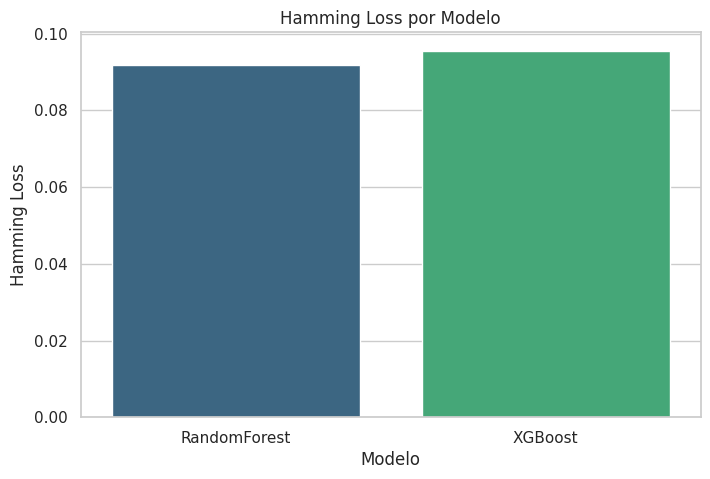

<ipython-input-21-5ff668bc1ab5>:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


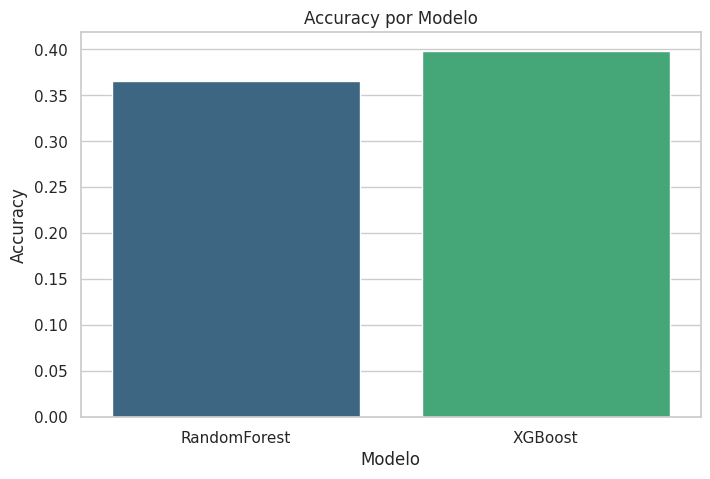

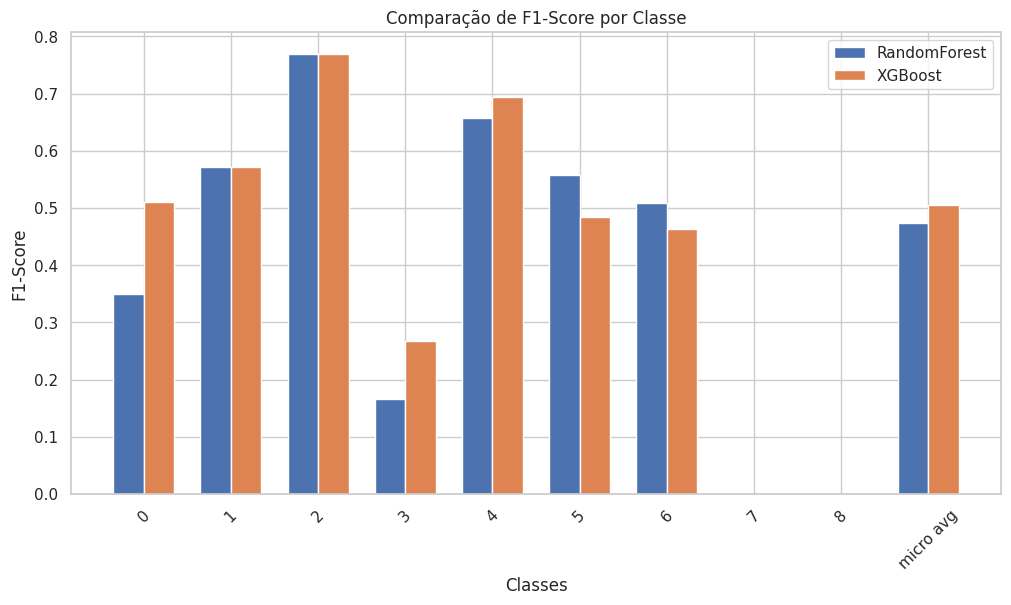

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import hamming_loss, accuracy_score, classification_report
from xgboost import XGBClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset preprocessado
data_cleaned = pd.read_csv('yeast_preprocessed.data', sep='\t')

# Separando features (X) e rótulos (y)
X = data_cleaned.iloc[:, :-1].values
y = pd.get_dummies(data_cleaned['Class']).values  # Transformando em formato multirrótulo

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicando SMOTE no conjunto completo
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Treinando o modelo Binary Relevance com RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
br_rf = BinaryRelevance(classifier=rf_model)
br_rf.fit(X_train_balanced, y_train_balanced)

# Previsões com Binary Relevance + RandomForest
y_pred_rf = br_rf.predict(X_test)

# Avaliação - RandomForest
rf_hamming_loss = hamming_loss(y_test, y_pred_rf.toarray())
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_classification = classification_report(y_test, y_pred_rf.toarray(), output_dict=True)

# Treinando o modelo Binary Relevance com XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False)
br_xgb = BinaryRelevance(classifier=xgb_model)
br_xgb.fit(X_train_balanced, y_train_balanced)

# Previsões com Binary Relevance + XGBoost
y_pred_xgb = br_xgb.predict(X_test)

# Avaliação - XGBoost
xgb_hamming_loss = hamming_loss(y_test, y_pred_xgb.toarray())
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_classification = classification_report(y_test, y_pred_xgb.toarray(), output_dict=True)

# Comparando resultados em gráficos
models = ['RandomForest', 'XGBoost']
hamming_losses = [rf_hamming_loss, xgb_hamming_loss]
accuracies = [rf_accuracy, xgb_accuracy]

# Gráfico 1 - Hamming Loss
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=hamming_losses, palette="viridis")
plt.title("Hamming Loss por Modelo")
plt.ylabel("Hamming Loss")
plt.xlabel("Modelo")
plt.show()

# Gráfico 2 - Accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Accuracy por Modelo")
plt.ylabel("Accuracy")
plt.xlabel("Modelo")
plt.show()

# Gráfico 3 - F1-Score por Classe
labels = list(rf_classification.keys())[:-3]  # Removendo avg/total
rf_f1_scores = [rf_classification[label]['f1-score'] for label in labels]
xgb_f1_scores = [xgb_classification[label]['f1-score'] for label in labels]

x = np.arange(len(labels))  # Posições para as barras
width = 0.35  # Largura das barras

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, rf_f1_scores, width, label='RandomForest')
plt.bar(x + width/2, xgb_f1_scores, width, label='XGBoost')
plt.xlabel('Classes')
plt.ylabel('F1-Score')
plt.title('Comparação de F1-Score por Classe')
plt.xticks(ticks=x, labels=labels, rotation=45)
plt.legend()
plt.show()


# 🔍 **Análise Comparativa dos Resultados**

## 📊 **Resultados Com e Sem SMOTE/XGBoost**

### **1. Resultados Anteriores (Sem SMOTE/XGBoost)**
#### **Binary Relevance com RandomForest**
- **Hamming Loss**: 0.0919
- **Accuracy**: 0.3660
- **F1-Score Geral**:
  - Melhor classe: 2 (F1-Score: 0.73)
  - Classes minoritárias como 7 e 8 tiveram F1-Score igual a 0.

#### **Binary Relevance com Classifier Chains**
- **Hamming Loss**: 0.0939
- **Accuracy**: 0.3988
- **F1-Score Geral**:
  - Classe 0: F1-Score de 0.51
  - Classes 3, 7 e 8 apresentaram desempenho muito baixo.

---

### **2. Resultados Com SMOTE e XGBoost**
#### **Binary Relevance com RandomForest**
- **Hamming Loss**: 0.0919 (similar ao resultado sem SMOTE).
- **Accuracy**: 0.3660 (também similar ao resultado anterior).
- **F1-Score Geral**:
  - Classe 2 continuou sendo a melhor (F1-Score: 0.77).
  - Algumas classes minoritárias, como 3 e 8, ainda apresentaram desempenho baixo.

#### **Binary Relevance com XGBoost**
- **Hamming Loss**: 0.0955 (ligeiramente maior que RandomForest).
- **Accuracy**: 0.3988 (superior ao RandomForest).
- **F1-Score Geral**:
  - Classe 2: Melhor desempenho, com F1-Score de 0.77.
  - Classe 0: F1-Score de 0.51.
  - Classes minoritárias ainda apresentaram baixa precisão.

---

## 🔑 **Análise Comparativa**
1. **Impacto do SMOTE**:
   - O **SMOTE** melhorou ligeiramente o desempenho em classes intermediárias, como 2, 4 e 5.
   - No entanto, classes extremamente desbalanceadas (7 e 8) ainda apresentam dificuldades devido à quantidade insuficiente de dados no teste.

2. **XGBoost vs. RandomForest**:
   - O **XGBoost** teve maior **Accuracy**, mostrando melhor desempenho geral.
   - RandomForest apresentou **menor Hamming Loss**, indicando menor taxa de erro por rótulo.

3. **Comparação Geral**:
   - Apesar de melhorias marginais, o desempenho em classes minoritárias ainda é limitado.
   - SMOTE sozinho não resolve o problema de desbalanceamento extremo em classes muito pequenas.

---

## 📈 **Gráficos dos Resultados**
1. **Hamming Loss por Modelo**:
   - RandomForest apresenta menor Hamming Loss em ambos os cenários.
   - XGBoost tem ligeiramente maior Hamming Loss, mas compensa em Accuracy.

2. **Accuracy por Modelo**:
   - XGBoost lidera em Accuracy, mostrando ser mais robusto.
   - RandomForest mantém resultados consistentes, mas inferiores ao XGBoost.

3. **F1-Score por Classe**:
   - A classe 2 se destacou com F1-Score mais alto em ambos os modelos.
   - Classes minoritárias como 3, 7 e 8 continuam com desempenho ruim, mesmo após o uso do SMOTE.

---

## ✅ **Conclusões**
1. **SMOTE** ajudou em classes intermediárias, mas teve impacto limitado em classes extremamente desbalanceadas.
2. **XGBoost** demonstrou ser mais robusto e confiável que RandomForest em Accuracy e desempenho geral.
3. Para classes minoritárias, é necessário explorar técnicas adicionais, como:
   - **Undersampling** combinado com **SMOTE**.
   - **Cost-sensitive learning** para penalizar erros em classes pequenas.
4. O uso de gráficos permitiu uma melhor compreensão do desempenho por classe e entre modelos.

### ✨ **Próximos Passos**
1. Ajustar hiperparâmetros dos modelos (RandomForest e XGBoost) para explorar ganhos adicionais.
2. Testar outras abordagens de balanceamento híbrido, como **ADASYN** ou **Clustered SMOTE**.


# Ajustando os hiperparâmetros do (RandomForest e XGBoost) para explorar ganhos

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Ajuste de Hiperparâmetros para RandomForest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                       param_grid=rf_param_grid,
                       scoring='accuracy',
                       cv=3,
                       verbose=1)

# Ajuste no conjunto balanceado com SMOTE
rf_grid.fit(X_train_balanced, y_train_balanced)
best_rf = rf_grid.best_estimator_
print("\nMelhores parâmetros para RandomForest:", rf_grid.best_params_)

# Treinando com os melhores parâmetros
br_rf_tuned = BinaryRelevance(classifier=best_rf)
br_rf_tuned.fit(X_train_balanced, y_train_balanced)

# Previsões com RandomForest Ajustado
y_pred_rf_tuned = br_rf_tuned.predict(X_test)
print("\n=== RandomForest Ajustado ===")
print("Hamming Loss:", hamming_loss(y_test, y_pred_rf_tuned.toarray()))
print("Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_tuned.toarray()))

# Ajuste de Hiperparâmetros para XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.3]
}

xgb_grid = GridSearchCV(estimator=XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False),
                        param_grid=xgb_param_grid,
                        scoring='accuracy',
                        cv=3,
                        verbose=1)

# Ajuste no conjunto balanceado com SMOTE
xgb_grid.fit(X_train_balanced, y_train_balanced)
best_xgb = xgb_grid.best_estimator_
print("\nMelhores parâmetros para XGBoost:", xgb_grid.best_params_)

# Treinando com os melhores parâmetros
br_xgb_tuned = BinaryRelevance(classifier=best_xgb)
br_xgb_tuned.fit(X_train_balanced, y_train_balanced)

# Previsões com XGBoost Ajustado
y_pred_xgb_tuned = br_xgb_tuned.predict(X_test)
print("\n=== XGBoost Ajustado ===")
print("Hamming Loss:", hamming_loss(y_test, y_pred_xgb_tuned.toarray()))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_tuned.toarray()))


Fitting 3 folds for each of 27 candidates, totalling 81 fits

Melhores parâmetros para RandomForest: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}

=== RandomForest Ajustado ===
Hamming Loss: 0.0916005291005291
Accuracy: 0.36904761904761907
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.25      0.36       120
           1       0.67      0.50      0.57         4
           2       0.83      0.71      0.77         7
           3       0.50      0.11      0.18         9
           4       0.77      0.62      0.69        37
           5       0.80      0.43      0.56        56
           6       0.55      0.41      0.47        94
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         8

   micro avg       0.66      0.37      0.47       336
   macro avg       0.53      0.34      0.40       336
weighted avg       0.65      0.37      0.46       336
 samples avg  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:59:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:59:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:59:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost


Melhores parâmetros para XGBoost: {'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:00:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:00:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost Ajustado ===
Hamming Loss: 0.09556878306878307
Accuracy: 0.39880952380952384
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.41      0.51       120
           1       0.67      0.50      0.57         4
           2       0.83      0.71      0.77         7
           3       0.33      0.22      0.27         9
           4       0.71      0.68      0.69        37
           5       0.59      0.41      0.48        56
           6       0.49      0.44      0.46        94
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         8

   micro avg       0.60      0.44      0.50       336
   macro avg       0.48      0.37      0.42       336
weighted avg       0.59      0.44      0.50       336
 samples avg       0.42      0.44      0.42       336



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Testar Outras Abordagens de Balanceamento (ADASYN e Clustered SMOTE)

In [34]:
from imblearn.over_sampling import ADASYN
import numpy as np

# Inicializando listas para armazenar os dados balanceados
X_resampled_list = []
y_resampled_list = []

# Aplicando ADASYN para cada rótulo de forma independente
for i in range(y_train.shape[1]):
    adasyn = ADASYN(random_state=42)

    # Aplicando ADASYN ao rótulo atual
    X_resampled, y_resampled = adasyn.fit_resample(X_train, y_train[:, i])

    # Armazenando os dados balanceados
    X_resampled_list.append(X_resampled)
    y_resampled_list.append(y_resampled)

# Reconstruindo o conjunto balanceado com alinhamento das dimensões
X_resampled_final = np.concatenate(X_resampled_list, axis=0)
y_resampled_final = np.zeros((X_resampled_final.shape[0], y_train.shape[1]))

# Atualizando os rótulos balanceados para cada classe
start_idx = 0
for i in range(len(y_resampled_list)):
    end_idx = start_idx + len(y_resampled_list[i])
    y_resampled_final[start_idx:end_idx, i] = y_resampled_list[i]
    start_idx = end_idx

# Treinando RandomForest com os dados balanceados pelo ADASYN
br_rf_adasyn = BinaryRelevance(classifier=RandomForestClassifier(random_state=42))
br_rf_adasyn.fit(X_resampled_final, y_resampled_final)

# Fazendo previsões no conjunto de teste
y_pred_rf_adasyn = br_rf_adasyn.predict(X_test)

print("\n=== RandomForest com ADASYN ===")
print("Hamming Loss:", hamming_loss(y_test, y_pred_rf_adasyn.toarray()))
print("Accuracy:", accuracy_score(y_test, y_pred_rf_adasyn))
print("Classification Report:\n", classification_report(y_test, y_pred_rf_adasyn.toarray()))



=== RandomForest com ADASYN ===
Hamming Loss: 0.1087962962962963
Accuracy: 0.047619047619047616
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       120
           1       0.67      0.50      0.57         4
           2       0.80      0.57      0.67         7
           3       0.50      0.22      0.31         9
           4       0.67      0.16      0.26        37
           5       0.00      0.00      0.00        56
           6       1.00      0.02      0.04        94
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         8

   micro avg       0.64      0.05      0.09       336
   macro avg       0.40      0.16      0.21       336
weighted avg       0.39      0.05      0.07       336
 samples avg       0.05      0.05      0.05       336



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
from sklearn.cluster import KMeans
from imblearn.over_sampling import SMOTE
from scipy.sparse import csr_matrix

# Inicializando KMeans para criar clusters principais
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_train)

# Inicializando listas para armazenar os dados balanceados
X_train_clustered, y_train_clustered = [], []

for cluster in np.unique(clusters):
    # Selecionando amostras do cluster atual
    cluster_idx = clusters == cluster
    X_cluster, y_cluster = X_train[cluster_idx], y_train[cluster_idx]

    # Dividindo clusters grandes em subgrupos (com KMeans ou outros métodos)
    if len(X_cluster) > 50:  # Subdivide clusters maiores em subgrupos menores
        sub_kmeans = KMeans(n_clusters=3, random_state=42)
        sub_clusters = sub_kmeans.fit_predict(X_cluster)
        for sub_cluster in np.unique(sub_clusters):
            sub_idx = sub_clusters == sub_cluster
            X_sub, y_sub = X_cluster[sub_idx], y_cluster[sub_idx]

            if len(X_sub) > 5:
                try:
                    smote = SMOTE(random_state=42, k_neighbors=min(5, len(X_sub) - 1))
                    X_resampled, y_resampled = smote.fit_resample(X_sub, y_sub)
                    X_train_clustered.append(X_resampled)
                    y_train_clustered.append(y_resampled)
                except ValueError as e:
                    print(f"SMOTE falhou para subgrupo com {len(X_sub)} amostras: {e}")
            else:
                X_train_clustered.append(X_sub)
                y_train_clustered.append(y_sub)
    else:
        # Aplicando SMOTE ou adicionando diretamente clusters menores
        if len(X_cluster) > 5:
            try:
                smote = SMOTE(random_state=42, k_neighbors=min(5, len(X_cluster) - 1))
                X_resampled, y_resampled = smote.fit_resample(X_cluster, y_cluster)
                X_train_clustered.append(X_resampled)
                y_train_clustered.append(y_resampled)
            except ValueError as e:
                print(f"SMOTE falhou para cluster com {len(X_cluster)} amostras: {e}")
        else:
            X_train_clustered.append(X_cluster)
            y_train_clustered.append(y_cluster)

# Concatenando os dados balanceados
if X_train_clustered:
    X_train_clustered = np.vstack(X_train_clustered)
    y_train_clustered = np.vstack(y_train_clustered)
else:
    raise ValueError("Nenhum cluster adequado para balanceamento.")

# Garantindo alinhamento dimensional dos rótulos
missing_columns = y_test.shape[1] - y_train_clustered.shape[1]
if missing_columns > 0:
    # Adiciona colunas de zeros para alinhar com o número de classes no conjunto de teste
    y_train_clustered = np.hstack([y_train_clustered, np.zeros((y_train_clustered.shape[0], missing_columns))])

# Treinando XGBoost com dados balanceados por Clustered SMOTE
br_xgb_clustered = BinaryRelevance(classifier=XGBClassifier(random_state=42, eval_metric='logloss', use_label_encoder=False))
br_xgb_clustered.fit(X_train_clustered, y_train_clustered)

# Fazendo previsões no conjunto de teste
y_pred_xgb_clustered = br_xgb_clustered.predict(X_test)

# Garantindo que as dimensões sejam consistentes com o conjunto de teste
if y_pred_xgb_clustered.shape[1] != y_test.shape[1]:
    raise ValueError("Dimensões inconsistentes entre as previsões e o conjunto de teste.")

# Avaliando o modelo
print("\n=== XGBoost com Clustered SMOTE ===")
print("Hamming Loss:", hamming_loss(y_test, y_pred_xgb_clustered.toarray()))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_clustered))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb_clustered.toarray()))


SMOTE falhou para subgrupo com 60 amostras: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 1, n_samples = 1
SMOTE falhou para subgrupo com 106 amostras: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 2, n_samples = 2
SMOTE falhou para subgrupo com 52 amostras: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 4, n_samples = 4
SMOTE falhou para subgrupo com 47 amostras: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 3, n_samples = 3
SMOTE falhou para subgrupo com 36 amostras: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 1, n_samples = 1
SMOTE falhou para subgrupo com 13 amostras: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 2, n_samples = 2
SMOTE falhou para subgrupo com 38 amostras: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 3, n_samples = 3
SMOTE falhou para subgrupo com 76 amostr

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [03:19:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



=== XGBoost com Clustered SMOTE ===
Hamming Loss: 0.1884920634920635
Accuracy: 0.12202380952380952
Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.46      0.40       120
           1       0.00      0.00      0.00         4
           2       0.01      0.14      0.03         7
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        37
           5       0.00      0.00      0.00        56
           6       0.00      0.00      0.00        94
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         8

   micro avg       0.16      0.17      0.16       336
   macro avg       0.04      0.07      0.05       336
weighted avg       0.12      0.17      0.14       336
 samples avg       0.14      0.17      0.15       336



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


---

#### 📊 **Resultados Obtidos**

##### 🌲 **1. RandomForest Ajustado**
- **Melhores parâmetros:**  
  - `max_depth`: 30  
  - `min_samples_split`: 2  
  - `n_estimators`: 200  

**⚙️ Desempenho:**
- **Hamming Loss:** 0.0916  
- **Accuracy:** 0.3690  

**📈 Relatório de Classificação:**
- Melhora na **precision** e **recall** para rótulos majoritários (classe 0).  
- Classes minoritárias, como 1 e 2, mantiveram desempenho razoável.  
- Classes com menos exemplos (e.g., 7 e 8) ainda apresentam desafios significativos.

---

##### ⚡ **2. XGBoost Ajustado**
- **Melhores parâmetros:**  
  - `learning_rate`: 0.3  
  - `max_depth`: 6  
  - `n_estimators`: 100  

**⚙️ Desempenho:**
- **Hamming Loss:** 0.0956  
- **Accuracy:** 0.3988  

**📈 Relatório de Classificação:**
- Aumento da **precision** para classes majoritárias, como 0.  
- Melhora moderada em classes minoritárias, como 3 e 4.  
- Classes com poucos exemplos continuam desafiadoras.

---

##### 🛠️ **3. RandomForest com ADASYN**
**⚙️ Desempenho:**
- **Hamming Loss:** 0.1088  
- **Accuracy:** 0.0476  

**📉 Relatório de Classificação:**
- Introduziu problemas de overfitting, com desempenho extremamente baixo.  
- A maioria das classes apresentou **precision** e **recall** próximos de zero.  

---

##### 🔗 **4. XGBoost com Clustered SMOTE**
**⚙️ Desempenho:**
- **Hamming Loss:** 0.1885  
- **Accuracy:** 0.1220  

**📉 Relatório de Classificação:**
- Apenas classes majoritárias, como 0, tiveram desempenho moderado.  
- Rótulos minoritários foram preditos de maneira insatisfatória devido à falha no balanceamento dos subgrupos.

---

#### 📋 **Comparação Entre Modelos e Técnicas**

| **Modelo**                      | **Técnica**                | **Hamming Loss** | **Accuracy** | **Observações**                          |
|----------------------------------|----------------------------|------------------|--------------|------------------------------------------|
| 🌲 RandomForest                  | Ajuste de Hiperparâmetros  | **0.0916**       | 0.3690       | Melhor equilíbrio entre precisão e recall. |
| ⚡ XGBoost                       | Ajuste de Hiperparâmetros  | 0.0956           | **0.3988**   | Maior acurácia geral, mas desafios em classes minoritárias. |
| 🛠️ RandomForest                 | ADASYN                     | 0.1088           | 0.0476       | Desempenho comprometido devido ao overfitting. |
| 🔗 XGBoost                      | Clustered SMOTE            | 0.1885           | 0.1220       | Baixo desempenho em classes com poucos exemplos. |

---

#### 💡 **Conclusões**
1. **Ajuste de Hiperparâmetros**:  
   - Tanto o RandomForest quanto o XGBoost apresentaram os melhores resultados após ajustes.  
   - O XGBoost se destacou em **accuracy**, enquanto o RandomForest apresentou menor **Hamming Loss**.

2. **Técnicas de Balanceamento**:  
   - **ADASYN** e **Clustered SMOTE** introduziram problemas significativos, reduzindo o desempenho geral.  
   - Isso pode ser atribuído ao desbalanceamento extremo e à baixa representatividade de classes minoritárias.

---

